# Test case $\ce{K-P}$

In this section, the existing data of $\ce{K-P}$ search and check if the low energy structures can be find by relaxation using M3GNet.

In [97]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

import warnings
from pathlib import Path
from ase.io import read
import ase
# from m3gnet.models import Relaxer
# from pymatgen.ext.matproj import MPRester

import pandas as pd
from tqdm import tqdm
tqdm = lambda x: x


from ase.io import read
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core import Structure
from matador.scrapers import res2dict

In [101]:
def load_matador_dataset(names):
    """Load dataset"""
    from matador.hull import QueryConvexHull
    cells, warnings = res2dict([str(n) for n in names], as_model=True, db=True)
    
    dataset = []

    hull = QueryConvexHull(cursor=cells, species=["K", "P"], no_plot=True)
    
    for atoms in cells:
        dataset.append(
        {
            'atoms': atoms.ase_atoms,
            'label': atoms['source'][0],
            'energy': atoms._data["enthalpy"],
            'formation_energy_per_atom': atoms._data["formation_enthalpy_per_atom"],
            'hull_distance': atoms._data["hull_distance"],
            'energy_per_atom': atoms._data["enthalpy_per_atom"],
            'volume': atoms.cell_volume,
            'volume_per_atom': atoms.cell_volume / atoms.num_atoms,

        }
    )

    return pd.DataFrame(dataset).sort_values('energy_per_atom'), hull


def show_compact(df):
    return df[['label', 'energy_per_atom', 'volume_per_atom']]

Successfully scraped 6751 out of 6751 files.
9 structures found within 0.0 eV of the hull, including chemical potentials.
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                Source                 !?!  Pressure  Cell volume      Hull dist.      Space group      Formula      # fu   Prov.  
                                             (GPa)      (Å³/fu)        (meV/atom)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
* K-OQMD_8500-CollCode44670                     0.09         72.3           0.0           Im-3m            K          1      ICSD  
* KP-NaP-CollCode56530                         -0.02        261.6           0.0           C2/m           K₅P₄         1     SWAPS  
* KP-NaP-OQMD_2817-CollCode14009               -0.04         56.0           0.0        P2_12_12_1         KP          8     SWAPS  


<AxesSubplot:title={'center':'K$_\\mathrm{x}$P$_\\mathrm{1-x}$'}, xlabel='x in K$_\\mathrm{x}$P$_\\mathrm{1-x}$', ylabel='Formation energy (eV/atom)'>

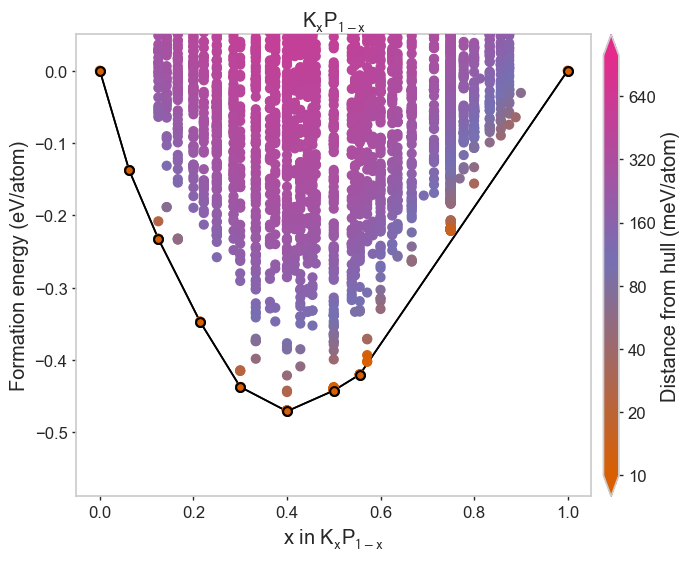

In [115]:
names = list(Path("K-P/K-P-known-dft").glob("*.res")) + list(Path("K-P/K-P-airss-dft").glob("*.res"))
df_dft, hull = load_matador_dataset(names)
hull.plot_hull()

In [117]:
names = Path("K-P/K-P-m3gnet").glob("*.res")
df_m3gnet, m3gnet_hull = load_matador_dataset(names)
m3gnet_hull.plot_hull()

Successfully scraped 6082 out of 6082 files.


RuntimeError: Found 0 of 2 required chemical potentials

In [48]:
df_m3gnet

,atoms,label,energy,energy_per_atom,volume,volume_per_atom
4103,"(Atom('P', [-1.6698395870952698, 3.22573066291...",K-P-m3gnet/KP-wnqmm6.res,-40.5366,-5.067075,250.824375,31.353047
2925,"(Atom('P', [-1.312102894115097, 4.202374920281...",K-P-m3gnet/KP-6651js.res,-80.9194,-5.057462,589.470793,36.841925
5237,"(Atom('P', [4.038585076995661, 3.3412898495531...",K-P-m3gnet/KP-c4oyuc.res,-40.4402,-5.055025,210.721471,26.340184
616,"(Atom('P', [-4.403636803176146e-06, 1.68441971...",K-P-m3gnet/KP-nusyaj.res,-40.4270,-5.053375,255.979399,31.997425
5471,"(Atom('P', [-5.064573071781575, -2.90066334958...",K-P-m3gnet/KP-hukpwq.res,-80.8470,-5.052937,504.269827,31.516864
...,...,...,...,...,...,...
6003,"(Atom('P', [-1.3283444209669027e-07, 1.1396572...",K-P-m3gnet/KP-lnayr5.res,-10.5693,-0.754950,485.532674,34.680905
457,"(Atom('P', [7.859704999954413, 2.2282263144945...",K-P-m3gnet/KP-kxf44c.res,-10.5693,-0.754950,485.532921,34.680923
6036,"(Atom('P', [4.3542998379999993e-10, 7.85974699...",K-P-m3gnet/KP-jo60ai.res,-10.5693,-0.754950,485.540767,34.681483
5673,"(Atom('P', [7.860404136909331, 7.8604049997610...",K-P-m3gnet/KP-bpozpx.res,-10.5693,-0.754950,485.662660,34.690190
